# Fetal Health Classification

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import RandomizedSearchCV

print("Libraries imported successfully!")

Libraries imported successfully!


In [110]:
import sklearn
import xgboost
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)


scikit-learn version: 1.6.0
xgboost version: 2.1.3


In [79]:
df = pd.read_csv('data/fetal_health.csv')

In [80]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [81]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_ter

None

In [10]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

/var/folders/zj/_p0jdvcj0v77npwz2g8xc_gh0000gn/T/ipykernel_25739/2042795173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fetal_health", data=df, palette="viridis")


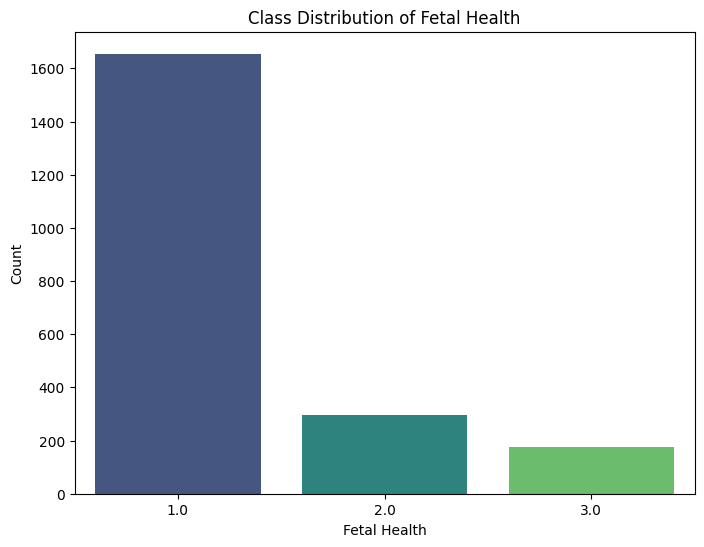

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="fetal_health", data=df, palette="viridis")
plt.title("Class Distribution of Fetal Health")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.show()

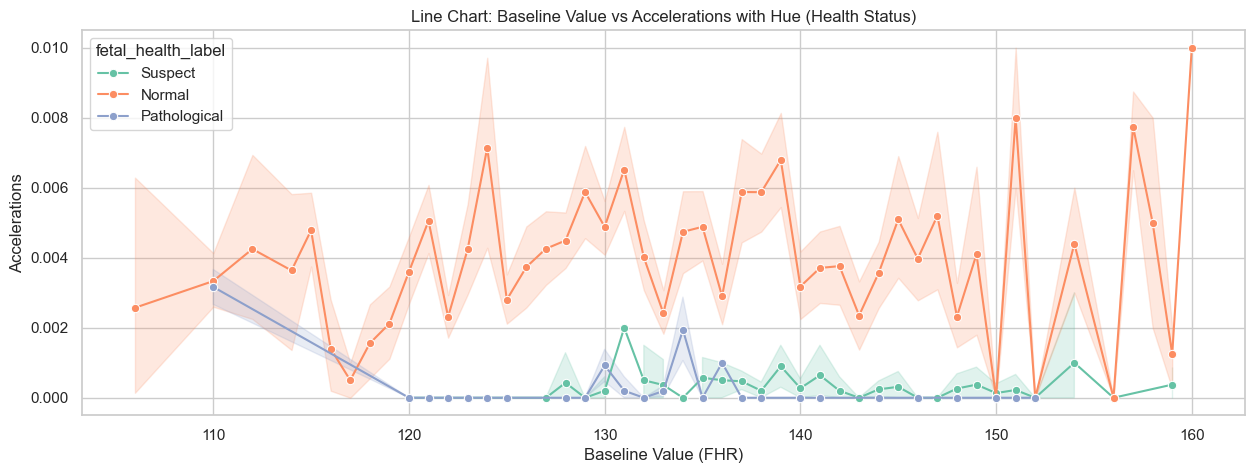

In [34]:
# Create a mapping dictionary for class labels
class_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}
df['fetal_health_label'] = df['fetal_health'].map(class_mapping)

# Plot the line chart with meaningful class names
plt.figure(figsize=(15, 5))
sns.lineplot(
    x='baseline value', 
    y='accelerations', 
    hue='fetal_health_label',  # Use the new column with meaningful labels
    data=df, 
    marker='o', 
    palette='Set2'
)
plt.title('Line Chart: Baseline Value vs Accelerations with Hue (Health Status)')
plt.xlabel('Baseline Value (FHR)')
plt.ylabel('Accelerations')
plt.grid(True)
plt.show()


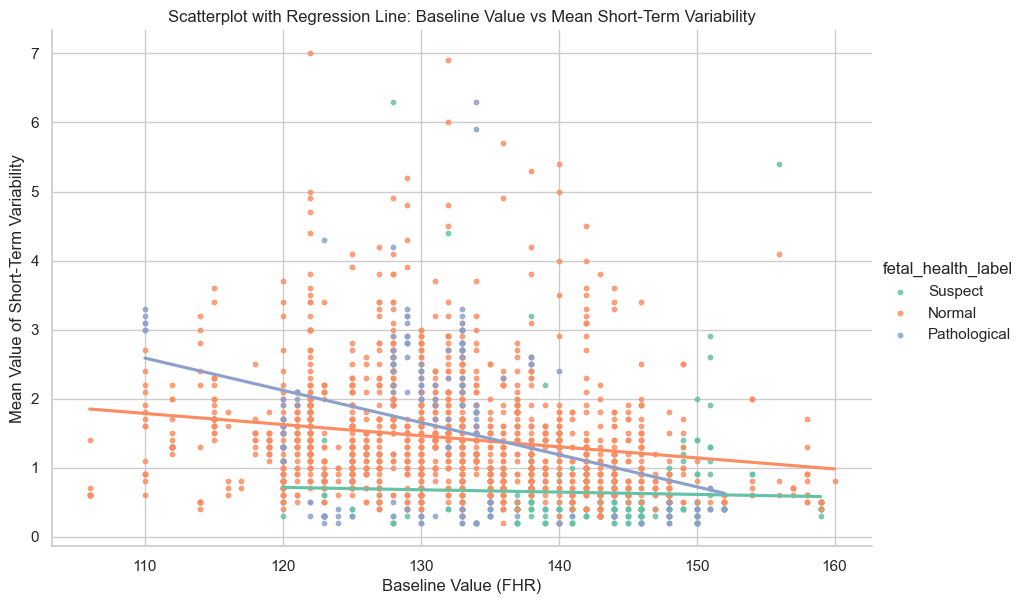

In [44]:

sns.lmplot(
    x='baseline value', 
    y='mean_value_of_short_term_variability', 
    hue='fetal_health_label',
    data=df, 
    palette='Set2',
    height=6, 
    aspect=1.5,
    scatter_kws={'s': 10},
    ci=None  
    
)

plt.title('Scatterplot with Regression Line: Baseline Value vs Mean Short-Term Variability')
plt.xlabel('Baseline Value (FHR)')
plt.ylabel('Mean Value of Short-Term Variability')
plt.grid(True)
plt.show()



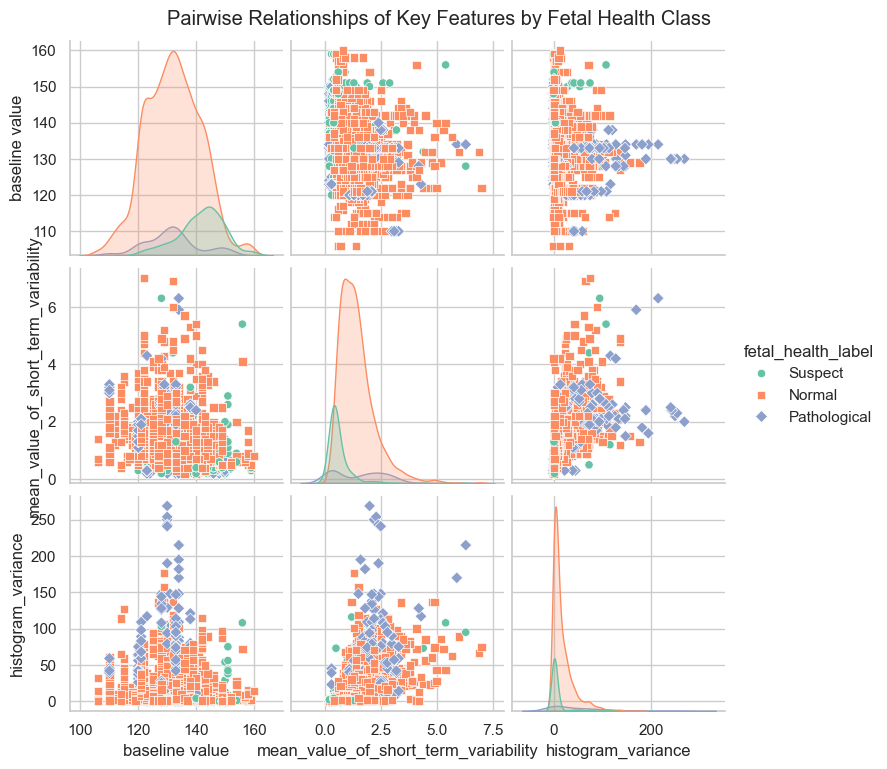

In [46]:
# Define the key features for pairwise analysis
features = ['baseline value', 'mean_value_of_short_term_variability', 'histogram_variance', 'fetal_health_label']

# Use seaborn pairplot for pairwise relationships
sns.pairplot(
    df[features],
    hue='fetal_health_label',
    diag_kind='kde',  # Kernel Density Estimate on diagonals
    palette='Set2',
    markers=["o", "s", "D"]
)

plt.suptitle('Pairwise Relationships of Key Features by Fetal Health Class', y=1.02)
plt.show()

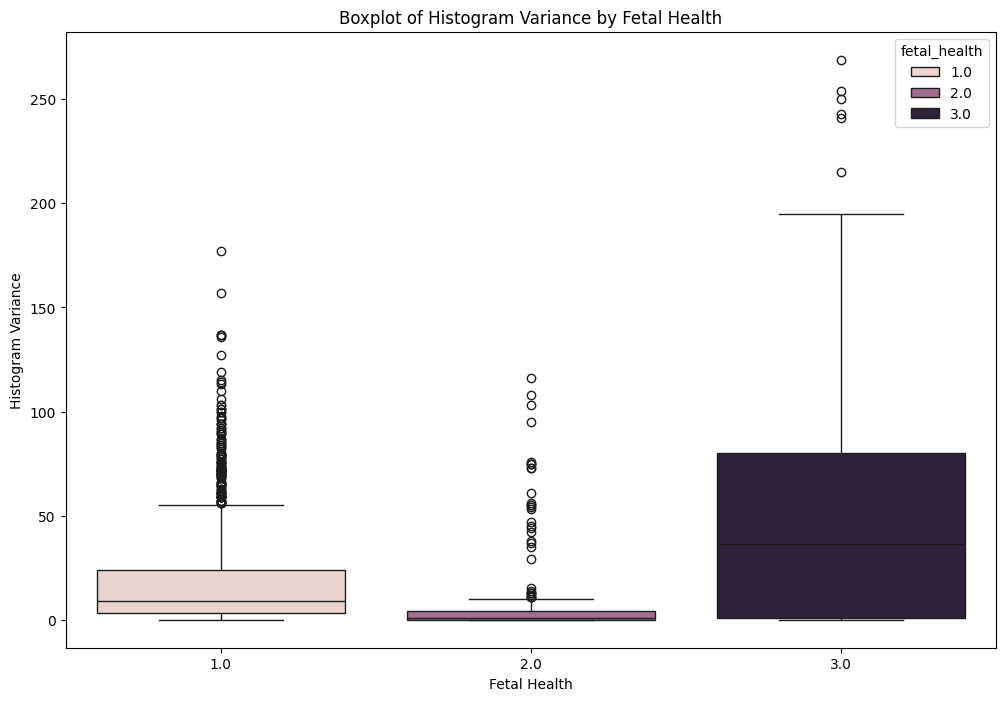

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='fetal_health', y='histogram_variance', data=df, hue="fetal_health")
plt.title("Boxplot of Histogram Variance by Fetal Health")
plt.xlabel("Fetal Health")
plt.ylabel("Histogram Variance")
plt.show()

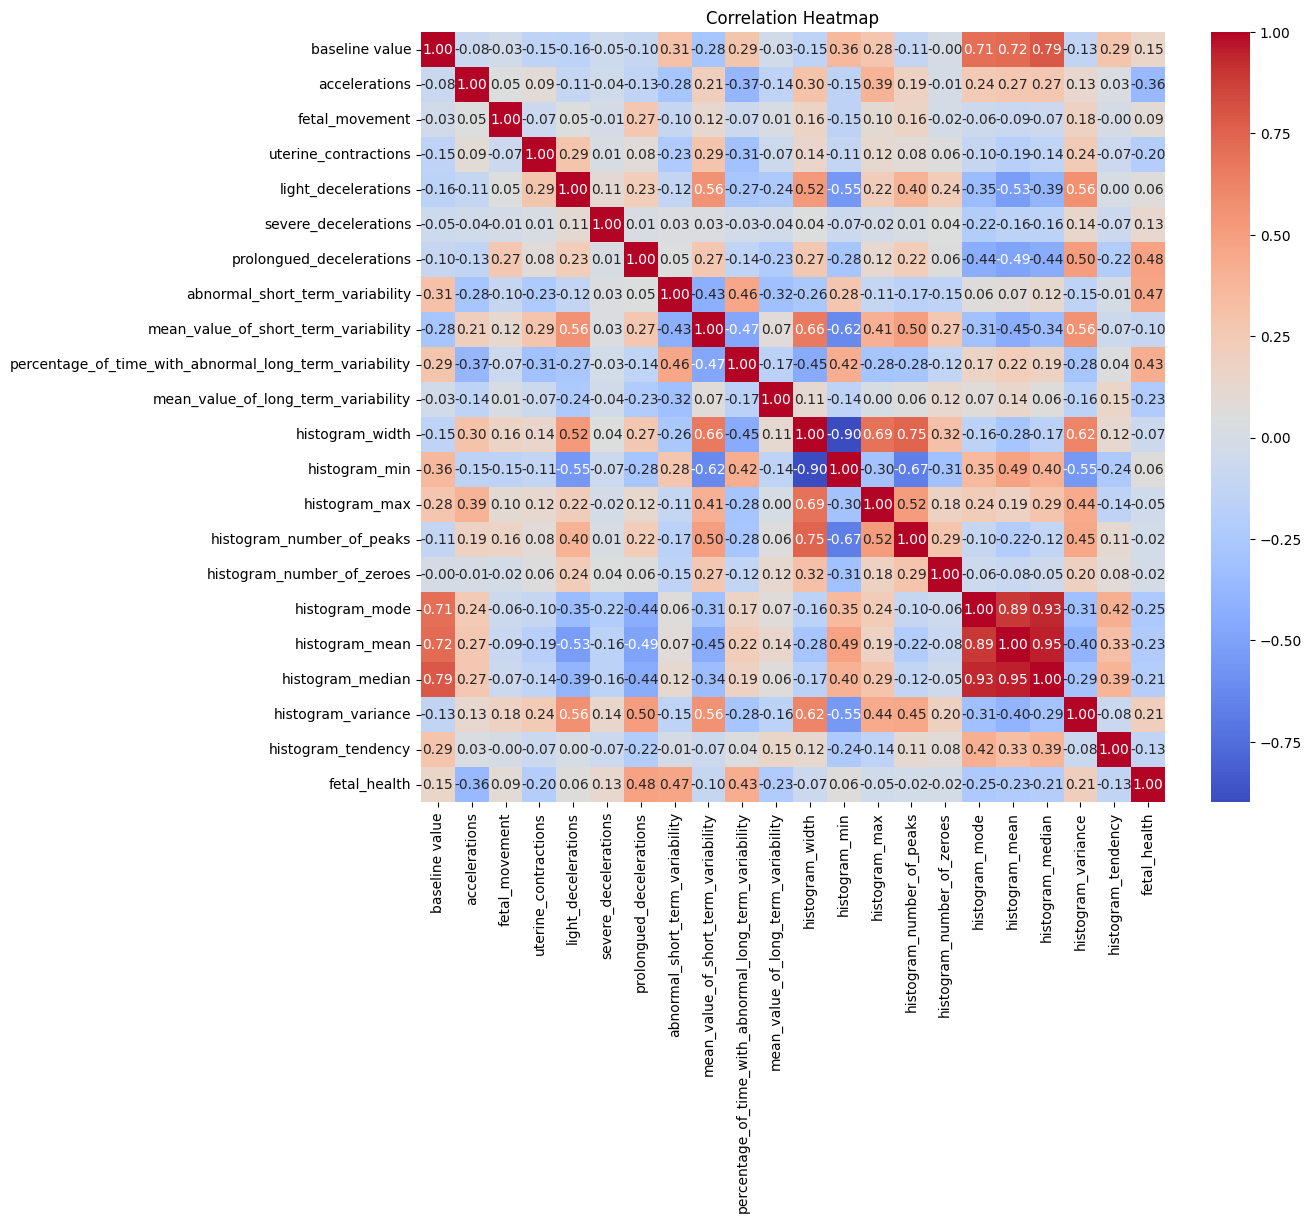

In [15]:
# Check for correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

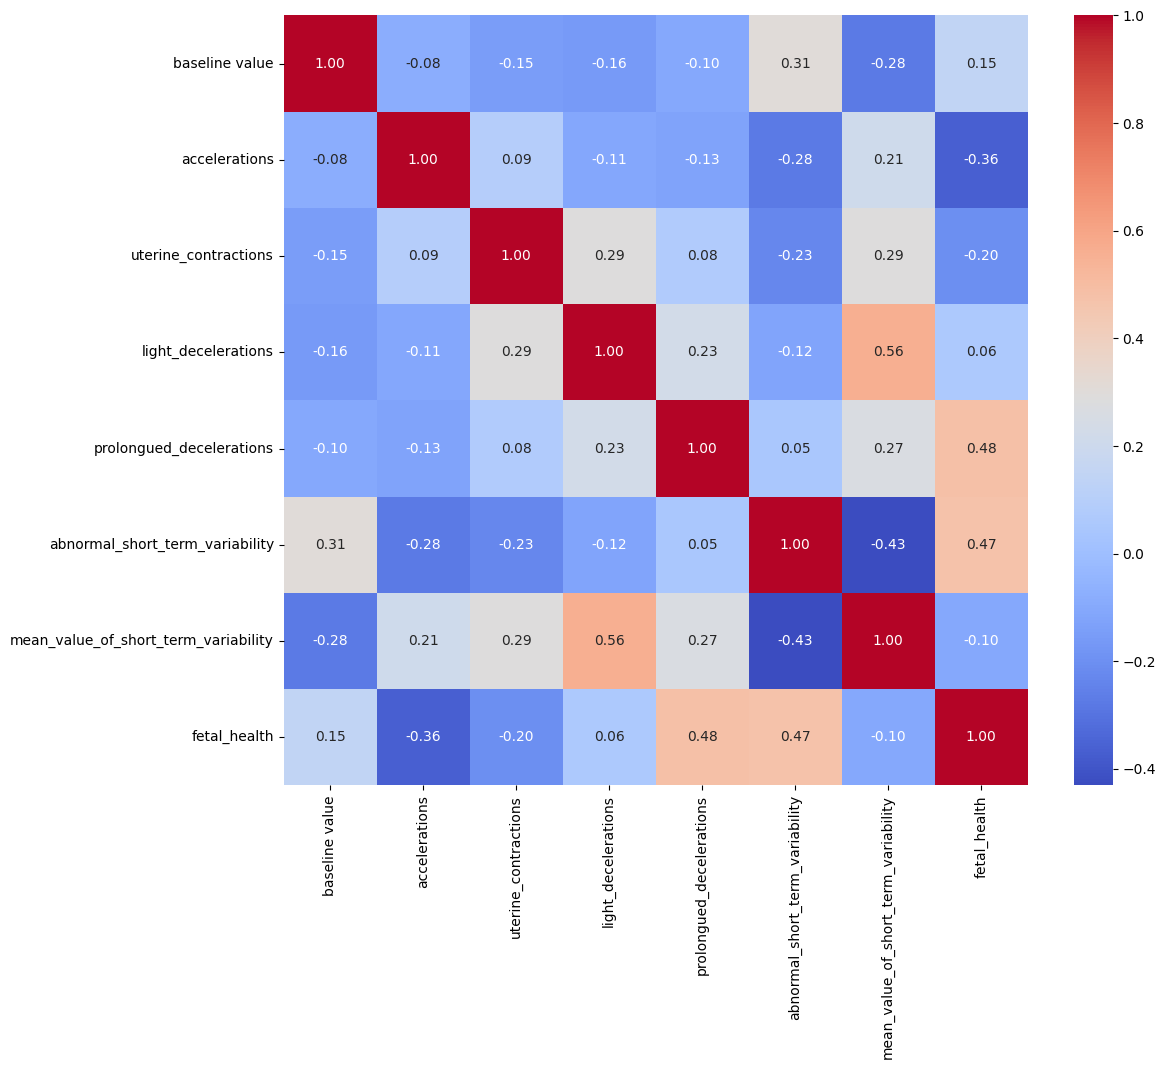

In [ ]:
# Create a smaller hearmap with selected features
df1 = df[['baseline value', 'accelerations', 'uterine_contractions', 'light_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'fetal_health']]
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',fmt='.2f')


Prolongued decelarations has the highest correlation with fetal health

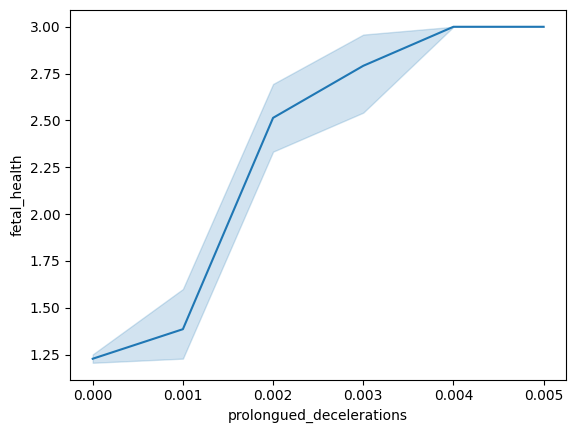

In [18]:
sns.lineplot(data=df,x='prolongued_decelerations',y='fetal_health')
plt.show()

In [84]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']


In [85]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [86]:
model.fit(X_train,y_train)

/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:

y_prediction= model.predict(X_test)

test_data_accuracy= accuracy_score(y_prediction, y_test)

print('Accuracy in test data-',test_data_accuracy)

Accuracy in test data- 0.8544600938967136


In [88]:
# Get the confusion matrix

conf_matrix = confusion_matrix(y_test, y_prediction)
conf_matrix

array([[322,   6,   4],
       [ 37,  19,   3],
       [  4,   8,  23]])

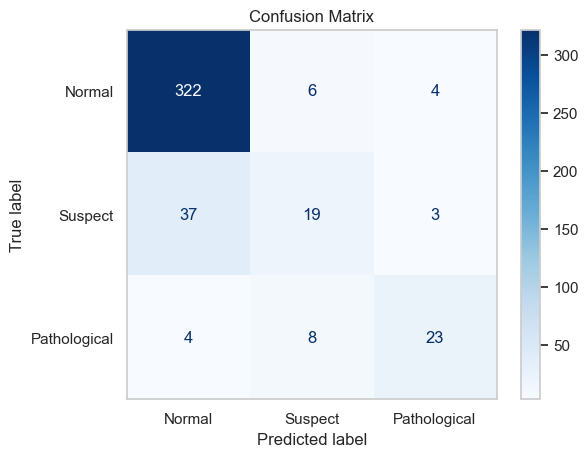

In [ ]:
# Define the correct class labels
class_labels = ["Normal", "Suspect", "Pathological"]

# Plot the cleaned confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


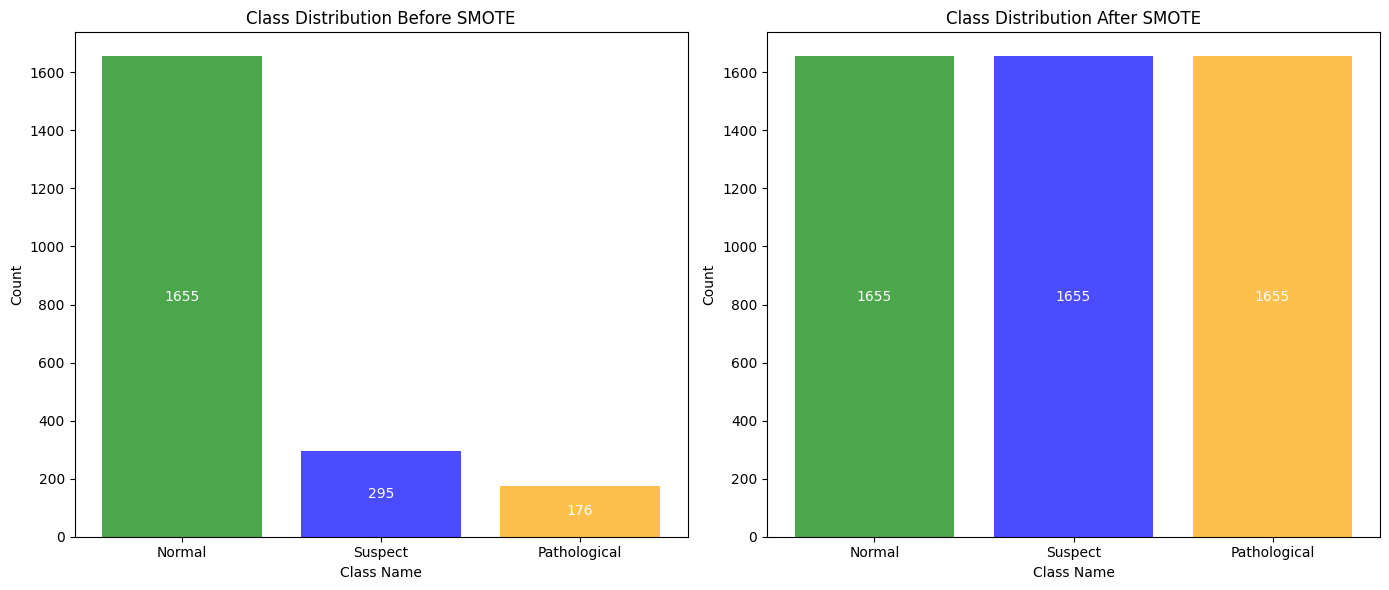

In [24]:
# Class names and colors
class_names = ['Suspect', 'Normal', 'Pathological']
class_colors = ['blue', 'green', 'orange']

# Plot before SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count occurrences for each class
counter = Counter(y)

# Create bars for class distribution
bars = axes[0].bar(counter.keys(), counter.values(), color=class_colors, alpha=0.7)

# Set labels and ticks
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel('Class Name')
axes[0].set_ylabel('Count')
axes[0].set_xticks(list(counter.keys()))  # Ensure only the class labels appear
axes[0].set_xticklabels(class_names)  # Add class names as x-axis labels

# Add counts in the middle of the bars
for bar, count in zip(bars, counter.values()):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                 str(count), ha='center', va='center', color='white', fontsize=10)


# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Plot after SMOTE (similar approach)
counter = Counter(y_smote)
bars = axes[1].bar(counter.keys(), counter.values(), color=class_colors, alpha=0.7)

axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel('Class Name')
axes[1].set_ylabel('Count')
axes[1].set_xticks(list(counter.keys()))
axes[1].set_xticklabels(class_names)

for bar, count in zip(bars, counter.values()):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
                 str(count), ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Map target variable to integers
class_mapping = {1.0: 0, 2.0: 1, 3.0: 2}
y_mapped = y.map(class_mapping)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, stratify=y_mapped, random_state=42)

In [ ]:
# Models to evaluate
default_models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
# Function to train models and print classification reports
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        print(f"\n=== Classification Report for {model_name} ===")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, target_names=["Normal", "Suspect", "Pathological"]))

# Evaluate models and print reports
evaluate_models(default_models, X_train, X_test, y_train, y_test)


=== Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.89      0.95      0.92       332
     Suspect       0.47      0.31      0.37        59
Pathological       0.87      0.74      0.80        35

    accuracy                           0.85       426
   macro avg       0.74      0.67      0.70       426
weighted avg       0.83      0.85      0.83       426


=== Classification Report for RandomForest ===
              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       332
     Suspect       0.85      0.66      0.74        59
Pathological       0.88      0.86      0.87        35

    accuracy                           0.92       426
   macro avg       0.89      0.83      0.86       426
weighted avg       0.92      0.92      0.92       426


=== Classification Report for GradientBoosting ===


/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       332
     Suspect       0.85      0.68      0.75        59
Pathological       0.84      0.91      0.88        35

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.93      0.93      0.92       426


=== Classification Report for XGBoost ===


/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       332
     Suspect       0.83      0.75      0.79        59
Pathological       0.91      0.91      0.91        35

    accuracy                           0.94       426
   macro avg       0.90      0.88      0.89       426
weighted avg       0.93      0.94      0.94       426



In [97]:
# Function to generate classification reports for pre-fitted models
def generate_classification_reports(models, X_test, y_test):
    for name, model in models.items():
        print(f"\n=== Classification Report for {name} ===")
        print(classification_report(
            y_test, model.predict(X_test),
            target_names=["Normal", "Suspect", "Pathological"]
        ))

# Generate and display classification reports
generate_classification_reports(default_models, X_test, y_test)



=== Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.89      0.95      0.92       332
     Suspect       0.47      0.31      0.37        59
Pathological       0.87      0.74      0.80        35

    accuracy                           0.85       426
   macro avg       0.74      0.67      0.70       426
weighted avg       0.83      0.85      0.83       426


=== Classification Report for RandomForest ===
              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96       332
     Suspect       0.78      0.68      0.73        59
Pathological       0.88      0.83      0.85        35

    accuracy                           0.92       426
   macro avg       0.87      0.83      0.85       426
weighted avg       0.92      0.92      0.92       426


=== Classification Report for GradientBoosting ===
              precision    recall  f1-score   support

      Normal       0.95      

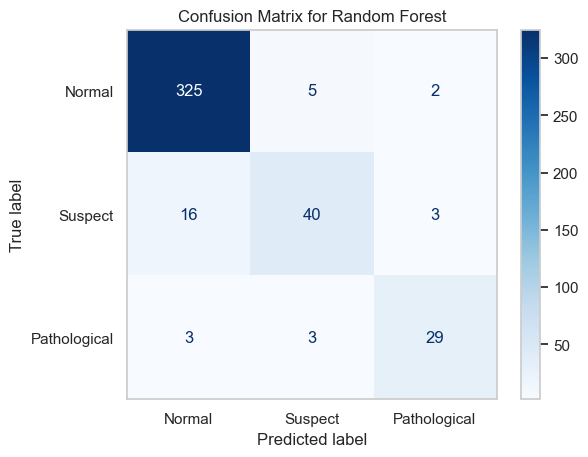

In [ ]:
# Initialize and train Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Normal", "Suspect", "Pathological"])
disp.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Random Forest")
plt.grid(False)  
plt.show()


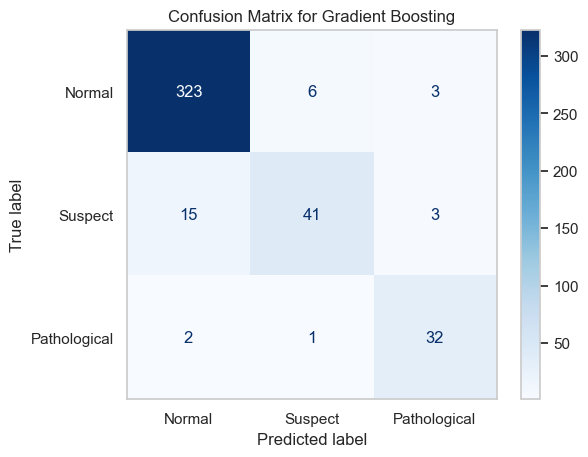

In [ ]:
# Initialize and train Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)


y_pred_gb = gradient_boosting.predict(X_test)


conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)


disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=["Normal", "Suspect", "Pathological"])
disp_gb.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Gradient Boosting")
plt.grid(False)  
plt.show()


/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:21:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


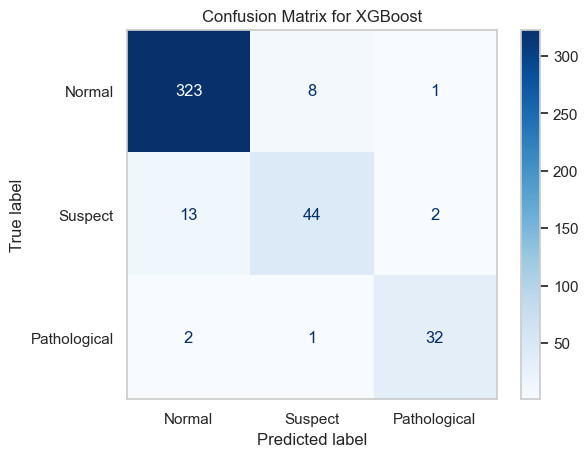

In [ ]:

# Initialize and train XGBoost classifier
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred_xgb = xgboost_model.predict(X_test)


conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=["Normal", "Suspect", "Pathological"])
disp_xgb.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for XGBoost")
plt.grid(False) 
plt.show()


/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Classification/fetal_env/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Users/shashwatsingh/Documents/GitHub/Fetal-Health-Cla

Random Forest Accuracy: 0.9808660624370594
Gradient Boosting Accuracy: 0.9758308157099698
XGBoost Accuracy: 0.9859013091641491

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       331
           1       0.95      0.99      0.97       331
           2       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       331
           1       0.96      0.98      0.97       331
           2       0.99      0.99      0.99       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993


XGBoost Classification Repor

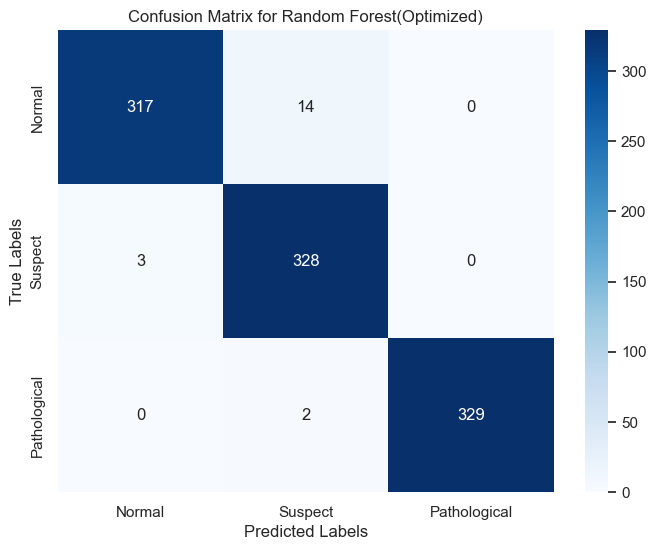

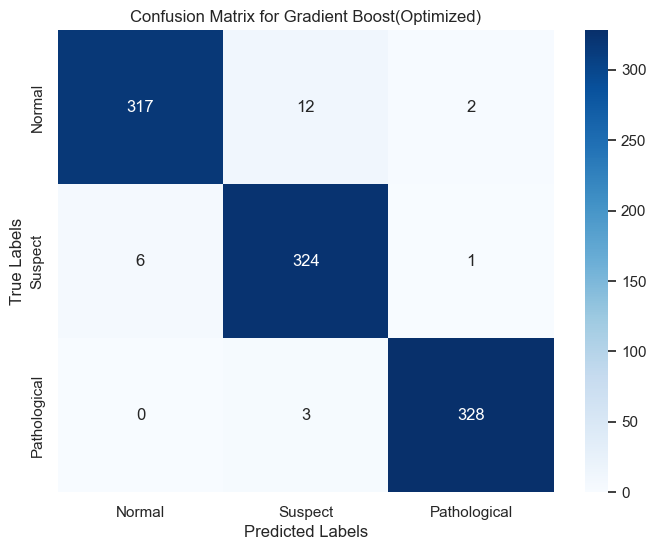

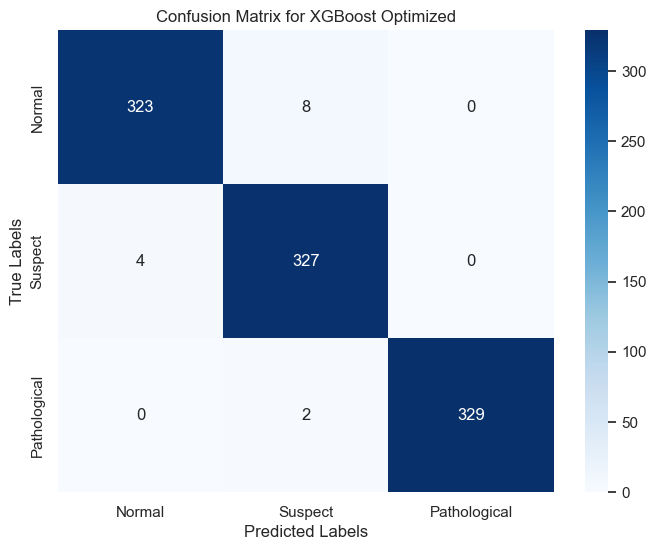

In [100]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
y_smote_mapped = y_smote.map(class_mapping)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote_mapped, test_size=0.2, stratify=y_smote_mapped, random_state=42)

# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the models
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Predict on the test set
rf_preds = random_forest.predict(X_test)
gb_preds = gradient_boost.predict(X_test)
xgb_preds = xgboost.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

# Classification Report for each model
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, rf_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.title('Confusion Matrix for Random Forest(Optimized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, gb_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.title('Confusion Matrix for Gradient Boost(Optimized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, xgb_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.title('Confusion Matrix for XGBoost Optimized')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=

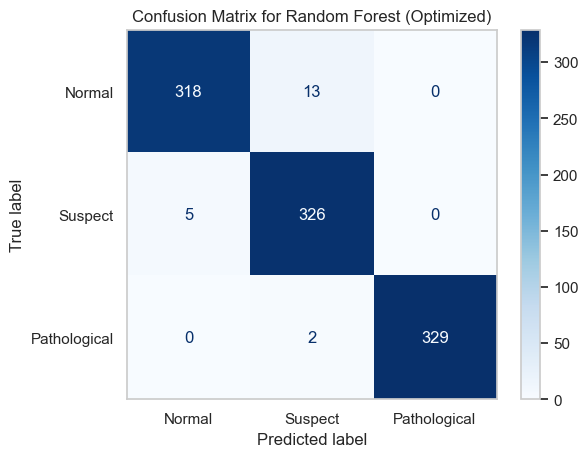

Classification Report for Random Forest (Optimized):

              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97       331
     Suspect       0.96      0.98      0.97       331
Pathological       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



In [ ]:

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'bootstrap': [True, False]  # Bootstrap samples
}

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=50,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='accuracy',
    n_jobs=-1  # Use all cores
)

# Fit RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Accuracy from Random Forest:", rf_random_search.best_score_)

# Predict on the test set using the best Random Forest model
best_rf_model = rf_random_search.best_estimator_
rf_preds_optimized = best_rf_model.predict(X_test)

# Confusion Matrix for the optimized Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_preds_optimized)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["Normal", "Suspect", "Pathological"])
disp_rf.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Random Forest (Optimized)")
plt.grid(False)
plt.show()

# Classification Report for the optimized Random Forest
print("Classification Report for Random Forest (Optimized):\n")
print(classification_report(y_test, rf_preds_optimized, target_names=["Normal", "Suspect", "Pathological"]))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   9.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   9.2s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.2s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.5s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  16.1s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   9.2s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;

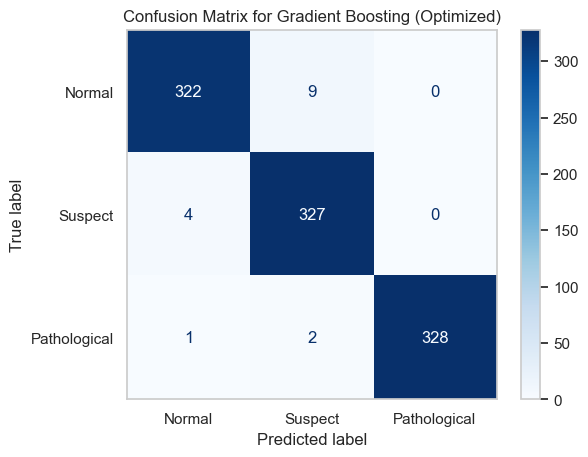

Classification Report for Gradient Boosting (Optimized):

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.98       331
     Suspect       0.97      0.99      0.98       331
Pathological       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



In [102]:
# Parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 10, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf
}

# Initialize RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=50,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='accuracy',
    n_jobs=-1  # Use all cores
)

# Fit RandomizedSearchCV
gb_random_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best Accuracy from Gradient Boosting:", gb_random_search.best_score_)

# Predict on the test set using the best Gradient Boosting model
best_gb_model = gb_random_search.best_estimator_
gb_preds_optimized = best_gb_model.predict(X_test)

# Confusion Matrix for the optimized Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, gb_preds_optimized)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=["Normal", "Suspect", "Pathological"])
disp_gb.plot(cmap='Blues', xticks_rotation='horizontal')
plt.title("Confusion Matrix for Gradient Boosting (Optimized)")
plt.grid(False)
plt.show()

# Classification Report for the optimized Gradient Boosting
print("Classification Report for Gradient Boosting (Optimized):\n")
print(classification_report(y_test, gb_preds_optimized, target_names=["Normal", "Suspect", "Pathological"]))
